In [20]:
from google.colab import files

# Upload the file manually
uploaded = files.upload()

Saving titanic.csv.csv to titanic.csv (6).csv


In [21]:
import pandas as pd

df = pd.read_csv("titanic.csv (2).csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
print(df.head())
print(df.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

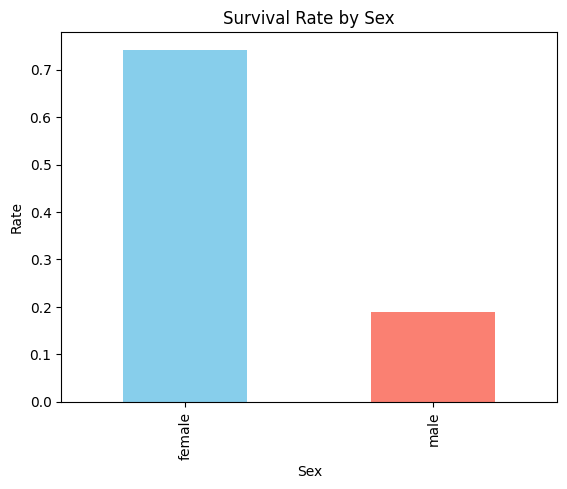

In [23]:
import matplotlib.pyplot as plt

# Survival rate by Sex
df.groupby("Sex")["Survived"].mean().plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Survival Rate by Sex")
plt.ylabel("Rate")
plt.show()

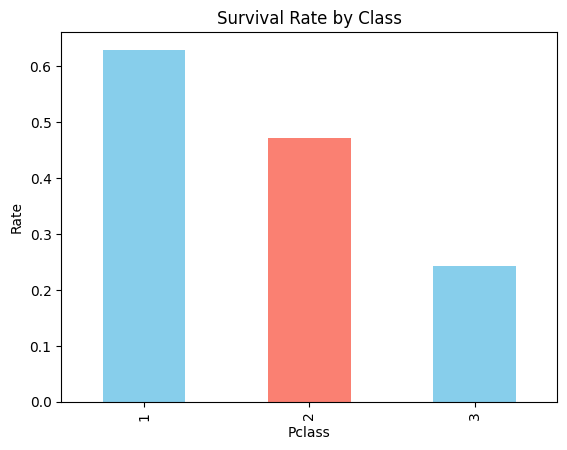

In [24]:
import matplotlib.pyplot as plt

# Survival rate by Sex
df.groupby("Class")["Survived"].mean().plot(kind="bar", color=["skyblue", "salmon"])
plt.title("Survival Rate by Class")
plt.ylabel("Rate")
plt.show()

In [25]:
# Fill missing age with median
df["Age"] = df["Age"].fillna(df["Age"].median())

# Fill Embarked
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

# Encode Sex
df["SexNum"] = (df["Sex"] == "male").astype(int)

# Create family size
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

# Age band
bins = [0, 12, 18, 30, 45, 60, 80]
labels = ["Child","Teen","YoungAdult","Adult","MidAge","Senior"]
df["AgeBand"] = pd.cut(df["Age"], bins=bins, labels=labels, right=False)